In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.drop(['PassengerId','Name'],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [7]:
df['Age'].isnull().sum()*100/df.shape[0]

19.865319865319865

In [8]:
m=df['Age'].mean()

In [9]:
m

29.69911764705882

In [10]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [11]:
df['Age'].fillna(m,inplace=True)

In [12]:
df['Cabin'].isnull().sum()*100/df.shape[0]

77.10437710437711

In [13]:
# As the total null percentage in Cabil column is greater than 40% we will remove the Cabin column
df.drop('Cabin',axis=1,inplace=True)

In [14]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64


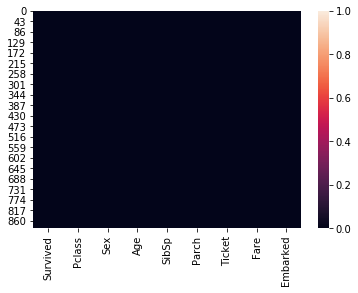

In [15]:
print(df.isnull().sum())
sns.heatmap(df.isnull())
plt.show()

In [16]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
df['Embarked'].isnull().sum()*100/df.shape[0]

0.2244668911335578

In [18]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
df['Embarked'].fillna('S',inplace=True)

In [20]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

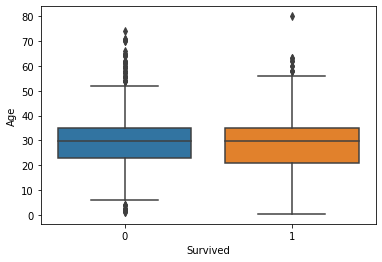

In [22]:
sns.boxplot(data=df,x="Survived",y="Age")
plt.show()

In [23]:
df[df['Age']>67]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
96,0,1,male,71.0,0,0,PC 17754,34.6542,C
116,0,3,male,70.5,0,0,370369,7.7500,Q
493,0,1,male,71.0,0,0,PC 17609,49.5042,C
630,1,1,male,80.0,0,0,27042,30.0000,S
672,0,2,male,70.0,0,0,C.A. 24580,10.5000,S
745,0,1,male,70.0,1,1,WE/P 5735,71.0000,S
851,0,3,male,74.0,0,0,347060,7.7750,S


In [24]:
df.drop([96,116,493,630,672,745,851],inplace=True)

In [25]:
df[df['Age']>67]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


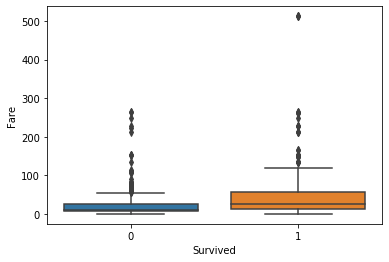

In [26]:
sns.boxplot(data=df,x="Survived",y="Fare")
plt.show()

In [27]:
df[df['Fare']>400]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,1,1,female,35.0,0,0,PC 17755,512.3292,C
679,1,1,male,36.0,0,1,PC 17755,512.3292,C
737,1,1,male,35.0,0,0,PC 17755,512.3292,C


In [28]:
df.drop([258,679,737],inplace=True)

In [29]:
df[df['Fare']>400]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [30]:
df['SibSp'].value_counts()

0    599
1    208
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [31]:
df['Parch'].value_counts()

0    670
1    116
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [32]:
df1=df.select_dtypes('object')
df2=df.select_dtypes(['int64','float64'])

In [33]:
df1.head()

,Sex,Ticket,Embarked
0,male,A/5 21171,S
1,female,PC 17599,C
2,female,STON/O2. 3101282,S
3,female,113803,S
4,male,373450,S


In [34]:
df2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 881 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  881 non-null    int64  
 1   Pclass    881 non-null    int64  
 2   Age       881 non-null    float64
 3   SibSp     881 non-null    int64  
 4   Parch     881 non-null    int64  
 5   Fare      881 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 48.2 KB


In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 881 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sex       881 non-null    object
 1   Ticket    881 non-null    object
 2   Embarked  881 non-null    object
dtypes: object(3)
memory usage: 27.5+ KB


In [37]:
from sklearn.preprocessing import LabelEncoder
for col in df1:
    le=LabelEncoder()
    df1[col]=le.fit_transform(df1[[col]])

In [38]:
df1.head()

,Sex,Ticket,Embarked
0,1,520,2
1,0,592,0
2,0,662,2
3,0,49,2
4,1,469,2


In [39]:
df3=pd.concat([df1,df2],axis=1)

In [40]:
df3.head()

,Sex,Ticket,Embarked,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,520,2,0,3,22.0,1,0,7.2500
1,0,592,0,1,1,38.0,1,0,71.2833
2,0,662,2,1,3,26.0,0,0,7.9250
3,0,49,2,1,1,35.0,1,0,53.1000
4,1,469,2,0,3,35.0,0,0,8.0500


In [41]:
df4=df3.drop('Survived',axis=1)
df5=df3['Survived']

In [42]:
df6=df4.drop(['Age','Fare'],axis=1)
df7=df4[['Age','Fare']]

In [43]:
from sklearn.preprocessing import StandardScaler
for col in df7:
    ss=StandardScaler()
    df7[col]=ss.fit_transform(df7[[col]])

In [44]:
df7.head()

,Age,Fare
0,-0.587762,-0.565449
1,0.693290,0.986163
2,-0.267499,-0.549093
3,0.453092,0.545558
4,0.453092,-0.546064


In [45]:
df_new=pd.concat([df6,df7,df5],axis=1)

In [46]:
df_new.head()

,Sex,Ticket,Embarked,Pclass,SibSp,Parch,Age,Fare,Survived
0,1,520,2,3,1,0,-0.587762,-0.565449,0
1,0,592,0,1,1,0,0.693290,0.986163,1
2,0,662,2,3,0,0,-0.267499,-0.549093,1
3,0,49,2,1,1,0,0.453092,0.545558,1
4,1,469,2,3,0,0,0.453092,-0.546064,0


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.svm import LinearSVC,SVC

In [48]:
X=df_new.drop("Survived",axis=1)
Y=df_new['Survived']

In [49]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [50]:
def create_model(model):
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    print(classification_report(Y_test,Y_pred))
    print(confusion_matrix(Y_test,Y_pred))
    return model

In [51]:
lr=LogisticRegression()
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       161
           1       0.70      0.62      0.66       104

    accuracy                           0.75       265
   macro avg       0.74      0.73      0.73       265
weighted avg       0.74      0.75      0.74       265

[[133  28]
 [ 39  65]]


In [52]:
svc=LinearSVC(random_state=1)
svc=create_model(svc)

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       161
           1       0.69      0.63      0.66       104

    accuracy                           0.74       265
   macro avg       0.73      0.72      0.73       265
weighted avg       0.74      0.74      0.74       265

[[131  30]
 [ 38  66]]


In [53]:
svc=LinearSVC(random_state=1,C=1)
svc=create_model(svc)

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       161
           1       0.69      0.63      0.66       104

    accuracy                           0.74       265
   macro avg       0.73      0.72      0.73       265
weighted avg       0.74      0.74      0.74       265

[[131  30]
 [ 38  66]]


In [54]:
psvc=SVC(kernel='poly',random_state=1)
psvc=create_model(psvc)

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       161
           1       0.00      0.00      0.00       104

    accuracy                           0.61       265
   macro avg       0.30      0.50      0.38       265
weighted avg       0.37      0.61      0.46       265

[[161   0]
 [104   0]]


In [55]:
rsvc=SVC(kernel='rbf',random_state=1)
rsvc=create_model(rsvc)

              precision    recall  f1-score   support

           0       0.66      0.84      0.74       161
           1       0.57      0.34      0.42       104

    accuracy                           0.64       265
   macro avg       0.62      0.59      0.58       265
weighted avg       0.63      0.64      0.62       265

[[135  26]
 [ 69  35]]


In [56]:
dt=DecisionTreeClassifier()
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.81      0.73      0.76       161
           1       0.63      0.73      0.68       104

    accuracy                           0.73       265
   macro avg       0.72      0.73      0.72       265
weighted avg       0.74      0.73      0.73       265

[[117  44]
 [ 28  76]]


In [57]:
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score

In [58]:
# Forward selection
column=[]
for i in X:
    column.append(i)
    X_new=df_new[column]
    X_train,X_test,Y_train,Y_test=train_test_split(X_new,Y,test_size=0.3,random_state=1)
    lr=LogisticRegression()
    lr.fit(X_train,Y_train)
    Y_pred=lr.predict(X_test)
    print(i,":",f1_score(Y_test,Y_pred))

Sex : 0.6497461928934011
Ticket : 0.6497461928934011
Embarked : 0.6497461928934011
Pclass : 0.6666666666666666
SibSp : 0.6770833333333333
Parch : 0.6701030927835051
Age : 0.6666666666666666
Fare : 0.6598984771573605


In [59]:
# Backward Selection
column=[]
X_new=X
n_col=X_new.shape[1]
for col in range(n_col,0,-1):
    column.append(X_new)
    X_train,X_test,Y_train,Y_test=train_test_split(X_new,Y,test_size=0.3,random_state=1)
    lr=LogisticRegression()
    lr.fit(X_train,Y_train)
    Y_pred=lr.predict(X_test)
    print(col,"F1-score:",f1_score(Y_test,Y_pred))
    X_new=X_new.iloc[:,:-1]
    print("After removing column: ",col)

8 F1-score: 0.6598984771573605
After removing column:  8
7 F1-score: 0.6666666666666666
After removing column:  7
6 F1-score: 0.6701030927835051
After removing column:  6
5 F1-score: 0.6770833333333333
After removing column:  5
4 F1-score: 0.6666666666666666
After removing column:  4
3 F1-score: 0.6497461928934011
After removing column:  3
2 F1-score: 0.6497461928934011
After removing column:  2
1 F1-score: 0.6497461928934011
After removing column:  1


In [60]:
# PCA 
X=df_new.drop("Survived",axis=1)
Y=df_new['Survived']

In [61]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [62]:
from sklearn.decomposition import PCA

In [63]:
pc=PCA(n_components=8,random_state=1)
X_train_pc=pc.fit_transform(X_train,Y_train)
X_test_pc=pc.transform(X_test)

In [64]:
dt=DecisionTreeClassifier()
dt.fit(X_train_pc,Y_train)
Y_pred=dt.predict(X_test_pc)
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       161
           1       0.67      0.71      0.69       104

    accuracy                           0.75       265
   macro avg       0.74      0.74      0.74       265
weighted avg       0.75      0.75      0.75       265

[[124  37]
 [ 30  74]]


In [65]:
from sklearn.ensemble import VotingClassifier

In [66]:
lr=LogisticRegression()
dt1=DecisionTreeClassifier()
dt2=DecisionTreeClassifier(criterion='entropy')

In [67]:
# Hard Voting
lst=[('Logistic Regression',lr),('Decision Tree Gini',dt1),('Decision Tree Entropy',dt2)]
vc1=VotingClassifier(estimators=lst)
vc1=create_model(vc1)

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       161
           1       0.67      0.72      0.69       104

    accuracy                           0.75       265
   macro avg       0.74      0.75      0.74       265
weighted avg       0.76      0.75      0.75       265

[[124  37]
 [ 29  75]]


In [68]:
# Soft Voting
lst=[('Logistic Regression',lr),('Decision Tree Gini',dt1),('Decision Tree Entropy',dt2)]
vc2=VotingClassifier(estimators=lst,voting='soft')
vc2=create_model(vc2)

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       161
           1       0.67      0.71      0.69       104

    accuracy                           0.75       265
   macro avg       0.74      0.74      0.74       265
weighted avg       0.75      0.75      0.75       265

[[125  36]
 [ 30  74]]


In [69]:
# Bagging

In [70]:
from sklearn.ensemble import BaggingClassifier

In [71]:
X_train.shape[0]

616

In [72]:
X_train.shape[0]/10

61.6

In [73]:
bc1=BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=62,random_state=1)
bc1=create_model(bc1)

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       161
           1       0.68      0.62      0.65       104

    accuracy                           0.74       265
   macro avg       0.72      0.72      0.72       265
weighted avg       0.73      0.74      0.73       265

[[130  31]
 [ 39  65]]


In [74]:
bc2=BaggingClassifier(DecisionTreeClassifier(),n_estimators=10,max_samples=62,random_state=1)
bc2=create_model(bc2)

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       161
           1       0.72      0.65      0.69       104

    accuracy                           0.77       265
   macro avg       0.76      0.75      0.75       265
weighted avg       0.76      0.77      0.76       265

[[135  26]
 [ 36  68]]


In [75]:
bc3=BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=62,random_state=1,bootstrap=False)
bc3=create_model(bc3)

              precision    recall  f1-score   support

           0       0.73      0.82      0.77       161
           1       0.66      0.54      0.59       104

    accuracy                           0.71       265
   macro avg       0.70      0.68      0.68       265
weighted avg       0.70      0.71      0.70       265

[[132  29]
 [ 48  56]]


In [76]:
bc4=BaggingClassifier(DecisionTreeClassifier(),n_estimators=10,max_samples=62,random_state=1,bootstrap=False)
bc4=create_model(bc4)

              precision    recall  f1-score   support

           0       0.79      0.86      0.83       161
           1       0.76      0.65      0.70       104

    accuracy                           0.78       265
   macro avg       0.77      0.76      0.76       265
weighted avg       0.78      0.78      0.78       265

[[139  22]
 [ 36  68]]


In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rfc=RandomForestClassifier(n_estimators=10,max_features=8,random_state=1)
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       161
           1       0.71      0.71      0.71       104

    accuracy                           0.77       265
   macro avg       0.76      0.76      0.76       265
weighted avg       0.77      0.77      0.77       265

[[131  30]
 [ 30  74]]


In [79]:
from mlxtend.classifier import StackingClassifier

In [80]:
lr=LogisticRegression()
dt1=DecisionTreeClassifier()
dt2=DecisionTreeClassifier(criterion="entropy")

In [81]:
model_list=[lr,dt1,dt2]

In [82]:
meta=LogisticRegression() 

In [83]:
sc=StackingClassifier(classifiers=model_list,meta_classifier=meta)
sc=create_model(sc)

              precision    recall  f1-score   support

           0       0.81      0.76      0.79       161
           1       0.66      0.72      0.69       104

    accuracy                           0.75       265
   macro avg       0.74      0.74      0.74       265
weighted avg       0.75      0.75      0.75       265

[[123  38]
 [ 29  75]]


In [84]:
from sklearn.ensemble import AdaBoostClassifier

In [85]:
ada=AdaBoostClassifier(n_estimators=100)
ada=create_model(ada)

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       161
           1       0.70      0.62      0.66       104

    accuracy                           0.75       265
   macro avg       0.74      0.72      0.73       265
weighted avg       0.74      0.75      0.74       265

[[134  27]
 [ 40  64]]


In [86]:
from sklearn.ensemble import GradientBoostingClassifier

In [87]:
gbc=GradientBoostingClassifier(n_estimators=100)
gbc=create_model(gbc)

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       161
           1       0.73      0.72      0.72       104

    accuracy                           0.78       265
   macro avg       0.77      0.77      0.77       265
weighted avg       0.78      0.78      0.78       265

[[133  28]
 [ 29  75]]


In [88]:
from xgboost import XGBClassifier

In [89]:
xgb=XGBClassifier(n_estimators=100,reg_alpha=1)
xgb=create_model(xgb)

[15:58:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       161
           1       0.73      0.69      0.71       104

    accuracy                           0.78       265
   macro avg       0.77      0.76      0.76       265
weighted avg       0.78      0.78      0.78       265

[[134  27]
 [ 32  72]]
